In [1]:
#import libararies here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl


(956,)


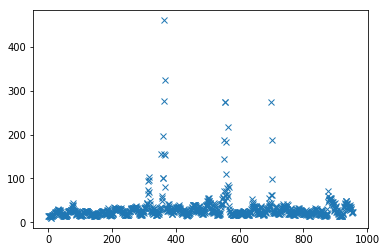

In [2]:
fileName = 'Training_Data.csv'
rawTrainingData = pd.read_csv(fileName).values
f = rawTrainingData[:,[6]] 
f = f.flatten()
print(f.shape)
plt.plot(f, 'x')

(901,)


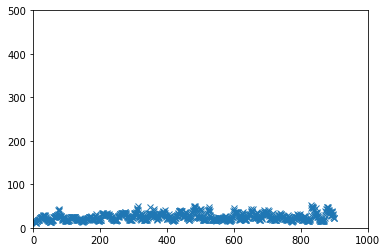

In [3]:

Q1=np.percentile(f, 25) ; # the value 25 is fixed for every problem;
Q3=np.percentile(f, 75) ; # the value 25 is fixed for every problem;
r=[Q1-1.5*(Q3-Q1),Q3+1.5*(Q3-Q1)];
pos = np.concatenate((np.where(f>r[1]),np.where(f<r[0])),axis=1)
newData = np.delete(rawTrainingData, pos, axis=0)

g = newData[:,[6]] 
g = g.flatten()
print(g.shape)
plt.xlim(0, 1000) # use the same axes setting as the above figure (with three outliers) to better reflect the difference
plt.ylim(0, 500)
plt.plot(g, 'x')
np.savetxt('ProcessedTrainingData.csv', newData, fmt='%.2f', delimiter=',', header=" T(t-2),T(t-1),T(t),D(t-2),D(t-1),D(t),P(t+1)")

(485,)


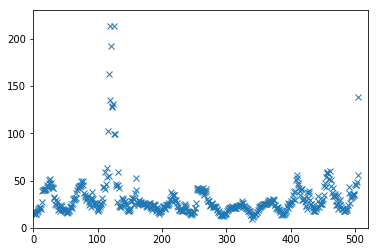

In [4]:
fileName = 'Testing_Data.csv'
rawTestingData = pd.read_csv(fileName).values
f = rawTestingData[:,[6]] 
f = f.flatten()
plt.xlim(0, 520) # use the same axes setting as the above figure (with three outliers) to better reflect the difference
plt.ylim(0, 230)
plt.plot(f, 'x')
Q1=np.percentile(f, 25) ; # the value 25 is fixed for every problem;
Q3=np.percentile(f, 75) ; # the value 25 is fixed for every problem;
r=[Q1-1.5*(Q3-Q1),Q3+1.5*(Q3-Q1)];
pos = np.concatenate((np.where(f>r[1]),np.where(f<r[0])),axis=1)
newTestingData = np.delete(rawTestingData, pos, axis=0)
g = newTestingData[:,[6]] 
g = g.flatten()
print(g.shape)

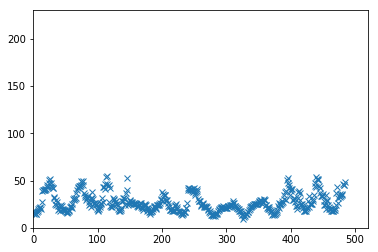

In [5]:
plt.xlim(0, 520) # use the same axes setting as the above figure (with three outliers) to better reflect the difference
plt.ylim(0, 230)
plt.plot(g, 'x')

In [6]:
np.savetxt('ProcessedTestingData.csv', newTestingData, fmt='%.2f', delimiter=',', header=" T(t-2),T(t-1),T(t),D(t-2),D(t-1),D(t),P(t+1)")



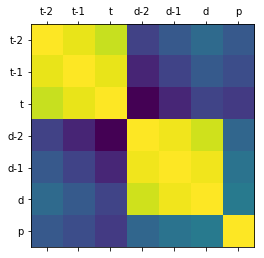

In [7]:
a = newData[:,[0]] # T(t-2)
a = a.flatten()
b = newData[:,[1]] # T(t-1)
b = b.flatten()
c = newData[:,[2]] #T(t)
c = c.flatten()
d1 = newData[:,[3]] #D(t-2)
d1 = d1.flatten()
d2 = newData[:,[4]] #D(t-1)
d2 = d2.flatten()
d3 = newData[:,[5]] #D(t)
d3 = d3.flatten()
p = newData[:,[6]] # price
p = p.flatten()

v = np.array([a,b,c,d1,d2,d3,p])
CCM=np.corrcoef(v)
plt.matshow(CCM)
groups= ['t-2','t-1','t','d-2','d-1', 'd', 'p']
x_pos = np.arange(len(groups))
plt.xticks(x_pos,groups)
 
y_pos = np.arange(len(groups))
plt.yticks(y_pos,groups)
 
plt.show()

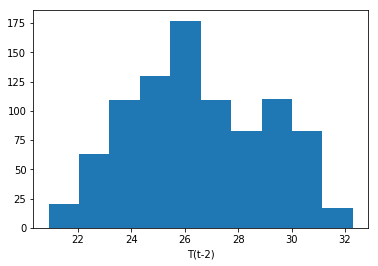

In [8]:
temperature = a


plt.hist(temperature)
plt.xlabel('T(t-2)');



20.9
32.3
1140


/Users/rpsr15/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


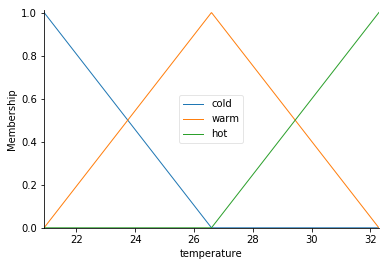

In [9]:

print(np.min(a))
print(np.max(a))
temperature = ctrl.Antecedent(np.arange(np.min(a),np.max(a),0.01), 'temperature')
print(np.arange(np.min(a),np.max(a),0.01).size)
temperature.automf(names=['cold', 'warm', 'hot'])
#temperature['cold'] = fuzz.trimf(temperature.universe, [20, 20, 26])
#temperature['warm'] = fuzz.trimf(temperature.universe, [20, 26, 34])
#temperature['hot'] = fuzz.trimf(temperature.universe, [26, 34, 34])
temperature.view()


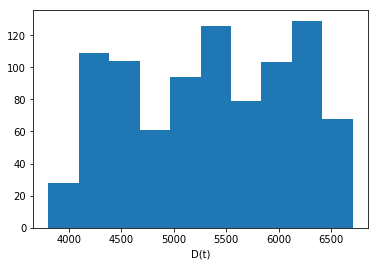

In [10]:
demand = d3


plt.hist(demand)
plt.xlabel('D(t)');



3807.6
6705.4
5796


/Users/rpsr15/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


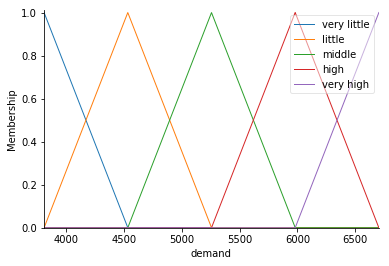

In [11]:
print(np.min(d3))
print(np.max(d3))
demand = ctrl.Antecedent(np.arange(np.min(d3),np.max(d3),0.5), 'demand')
print(np.arange(np.min(d3),np.max(d3),0.5).size)
demand.automf(names=['very little', 'little', 'middle', 'high','very high'])
#demand['very little'] = fuzz.trimf(demand.universe, [3600, 3600, 4510])
#demand['little'] = fuzz.trimf(demand.universe, [3600, 4500, 5250])
#demand['middle'] = fuzz.trimf(demand.universe, [4500, 5250, 6000])
#demand['high'] = fuzz.trimf(demand.universe, [5250, 6000, 6750])
#demand['very high'] = fuzz.trimf(demand.universe, [6000, 6750, 6750])


demand.view()

10.25
51.63


/Users/rpsr15/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


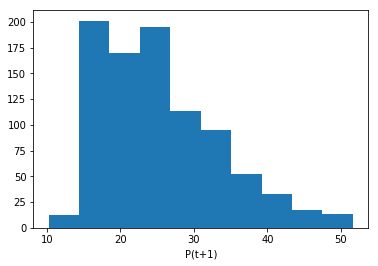

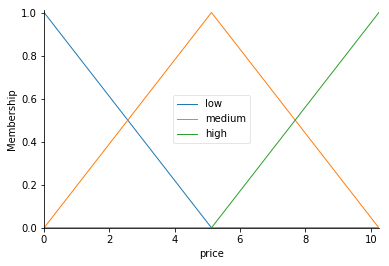

In [12]:
prices = p
plt.hist(prices)
plt.xlabel('P(t+1)');
print(np.min(prices))
print(np.max(prices))
prices = ctrl.Consequent(np.linspace(np.min(prices),0.01,prices.size), 'price')
prices.automf(names=['low', 'medium', 'high'])
#prices['low'] = fuzz.trimf(prices.universe, [0, 0, 30])
#prices['medium'] = fuzz.trimf(prices.universe, [0, 30,62])
#prices['high'] = fuzz.trimf(prices.universe, [30, 62, 62])
prices.view()


In [13]:
#membersip for temperature
t_cold = fuzz.trimf(temperature.universe, [18, 18, 26])
t_warm = fuzz.trimf(temperature.universe, [20, 26, 34])
t_hot = fuzz.trimf(temperature.universe, [26, 34, 34])
#memebership for demand
d_verylittle = fuzz.trimf(demand.universe, [3600, 3600, 4510])
d_little = fuzz.trimf(demand.universe, [3600, 4500, 5250])
d_middle = fuzz.trimf(demand.universe, [4500, 5250, 6000])
d_high = fuzz.trimf(demand.universe, [5250, 6000, 6750])
d_veryhigh = fuzz.trimf(demand.universe, [6000, 6750, 6750])
#membersip for prices
p_low = fuzz.trimf(prices.universe, [0, 0, 30])
p_medium = fuzz.trimf(prices.universe, [0, 30,62])
p_high = fuzz.trimf(prices.universe, [30, 62, 62])

#evaluate rules
index = 0
m_t_cold = fuzz.interp_membership(temperature.universe,t_cold, a[0])
m_t_warm = fuzz.interp_membership(temperature.universe,t_warm, a[0])
m_t_hot = fuzz.interp_membership(temperature.universe,t_hot, a[0])
print(a[0])
print(m_t_cold)
print(m_t_warm)
print(m_t_hot)



23.4
0.3250000000000002
0.5666666666666664
0.0


In [14]:

def getRule(temp, dmd, prc):
    #calculate membeship for temperature
    m_t_cold = fuzz.interp_membership(temperature.universe,t_cold, temp)
    m_t_warm = fuzz.interp_membership(temperature.universe,t_warm, temp)
    m_t_hot = fuzz.interp_membership(temperature.universe,t_hot, temp)
    temp_t = [m_t_cold, m_t_warm, m_t_hot]
    max_t = max(temp_t)
    temp_t = temp_t.index(max_t)
    
    #calculate membership for demand
    m_d_vl = fuzz.interp_membership(demand.universe,d_verylittle, dmd)
    m_d_l = fuzz.interp_membership(demand.universe,d_little, dmd)
    m_d_m = fuzz.interp_membership(demand.universe,d_middle, dmd)
    m_d_h = fuzz.interp_membership(demand.universe,d_high, dmd)
    m_d_vh = fuzz.interp_membership(demand.universe,d_veryhigh, dmd)
    temp_d = [m_d_vl, m_d_l, m_d_m, m_d_h, m_d_vh]
    max_d = max(temp_d)
    temp_d = temp_d.index(max_d)
    #calculate for price
    
    m_p_l = fuzz.interp_membership(prices.universe,p_low, prc)
    m_p_m = fuzz.interp_membership(prices.universe,p_medium, prc)
    m_p_h = fuzz.interp_membership(prices.universe,p_high, prc)
    temp_p = [m_p_l, m_p_m, m_p_h]
    max_p = max(temp_p)
    temp_p = temp_p.index(max_p)
    
    
    degreeRule = max_t * max_d * max_p
    rule_string = "{}{}{}".format(temp_t, temp_d, temp_p) 
    tup1 = (rule_string, degreeRule)
    return tup1


In [15]:
rulebase = {"000":0.5}
print(a.size)
for i in range(a.size):
    
    rule_result = getRule(a[i], d3[i], p[i])
    if rule_result[0] == "202":
        print(rule_result)
    #print(rule_result[0],rule_result[1])
    if rule_result[0] in rulebase:
        if rule_result[1] > rulebase[rule_result[0]]:
            rulebase[rule_result[0]] = rule_result[1] * rulebase[rule_result[0]]
            #print("upgrading",(rule_result[1] * rulebase[rule_result[0]]))
        
    else:
        rulebase[rule_result[0]] = rule_result[1]
  

901


In [16]:
print(rulebase)

{'000': 0.5, '110': 0.0, '100': 0.0, '010': 0.0, '120': 0.0, '220': 0.0, '130': 0.0, '140': 0.0, '240': 0.0, '230': 0.0, '040': 0.0, '030': 0.0, '020': 0.0, '210': 0.0}


In [17]:
final_rules = {"00":(0, 1.0)}
for rule_s, rule_de in rulebase.items():
    in_val = rule_s[:2]
    out_val = rule_s[2]
    dd = round(rule_de,6)
    print(in_val, out_val, dd)
    
    #if alrready there check for degree of rule
    if in_val in final_rules:
        if dd > final_rules[in_val][1]:
            final_rules[in_val] = (out_val, dd)
    #else add to final rules
    else:
        #temp_st = 
        final_rules[in_val] = (out_val, dd) 

00 0 0.5
11 0 0.0
10 0 0.0
01 0 0.0
12 0 0.0
22 0 0.0
13 0 0.0
14 0 0.0
24 0 0.0
23 0 0.0
04 0 0.0
03 0 0.0
02 0 0.0
21 0 0.0


In [18]:
print(final_rules)

{'00': (0, 1.0), '11': ('0', 0.0), '10': ('0', 0.0), '01': ('0', 0.0), '12': ('0', 0.0), '22': ('0', 0.0), '13': ('0', 0.0), '14': ('0', 0.0), '24': ('0', 0.0), '23': ('0', 0.0), '04': ('0', 0.0), '03': ('0', 0.0), '02': ('0', 0.0), '21': ('0', 0.0)}


In [19]:
rule1 = ctrl.Rule(temperature['cold'] & demand['very little'], prices['low'])
rule2 = ctrl.Rule(temperature['cold'] & demand['little'], prices['low'])
rule3 = ctrl.Rule(temperature['cold'] & demand['middle'], prices['medium'])
rule4 = ctrl.Rule(temperature['cold'] & demand['high'], prices['medium'])
rule5 = ctrl.Rule(temperature['cold'] & demand['very high'], prices['medium'])
rule6 = ctrl.Rule(temperature['warm'] & demand['very little'], prices['medium'])
rule7 = ctrl.Rule(temperature['warm'] & demand['little'], prices['medium'])
rule8 = ctrl.Rule(temperature['warm'] & demand['middle'], prices['high'])
rule9 = ctrl.Rule(temperature['warm'] & demand['high'], prices['high'])
rule10 = ctrl.Rule(temperature['warm'] & demand['very high'], prices['high'])
rule11 = ctrl.Rule(temperature['hot'] & demand['very little'], prices['low'])
rule12 = ctrl.Rule(temperature['hot'] & demand['little'], prices['medium'])
rule13 = ctrl.Rule(temperature['hot'] & demand['middle'], prices['medium'])
rule14 = ctrl.Rule(temperature['hot'] & demand['high'], prices['high'])
rule15 = ctrl.Rule(temperature['hot'] & demand['very high'], prices['high'])
prices_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])

price_simulation = ctrl.ControlSystemSimulation(prices_ctrl)

In [20]:
#testing data
#finalTestingData = pd.read_csv("ProcessedTestingData.csv").values
##finalTestingData = finalTestingData[:,(0,5,6)]
#finalTestingData.shape


price_simulation.input['temperature'] = 23
price_simulation.input['demand'] = 4000
sim_out = price_simulation.output['price']
diff = abs((t_val[2] - sim_out))
print(t_val,"expected:",t_val[2],"actual:",sim_out,"diff:",diff)

KeyError: 'price'

In [ ]:
System_outputs=np.zeros(485,dtype=np.float64)
i = 0
sum = 0
for t_val in finalTestingData:
    price_simulation.input['temperature'] = t_val[0]
    price_simulation.input['demand'] = t_val[1]
    price_simulation.compute()
    sim_out = price_simulation.output['price']
    
    diff = abs((t_val[2] - sim_out)/t_val[2])
    sum += diff
    print(t_val,"expected:",t_val[2],"actual:",sim_out,"diff:",diff)
    System_outputs[i]=sim_out
    i += 1

# Crunch the numbers
print(sum)
print(sum/485)